<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249F20/)</center>

## Homework Submission
After completed the homework notebook. 
- Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your NetID below.
- `Kernel`$\rightarrow$ `Restart & Run All` (in the menubar).
- You can generated zip file using following command:
    ```python
    NetID=''
    make_submission(NetID)
    ```
- Double-check **generated zip file**, text, math, code, outputs, figures. Re-run if needed.
- Sumbit the zip file via blackboard.
- 1% deduction of late assignment total score per hour passing the deadline.
---------


## Part 1. Segmentation
----
### Problem 1.1

Recall the steps of K-means clustering:

1. Randomly initilize the cluster centers
2. Given cluster centers, determin points in each cluster
    * For each point p, find the closest $c_i$, Put p into cluster i
3. Given points in each cluster, solve for $c_i$
    * Set $c_i$ to be the mean of points in cluster i
4. If $c_i$ have changed, repeat Step 2
    




In [7]:
from cs249 import *
img = cv2.imread(str('UR.jpg'))

#### a. find nearest center
First, you will implement Step 2 in the algorithm.

To find the cluster that the pixel $p$ belongs, you need to return ${\operatorname{argmin} \lVert p - c_i \rVert_2}$

In [8]:
def nearest_center(centers,pixel):
    distance = []
    pixel = np.array(pixel)
    for center in centers:
        center = np.array(center)
        distance.append(np.linalg.norm(center-pixel))
    return np.argmin(distance)

In [9]:
# If correctly implemented, you should get 4 by running the next cell. Note: It's a very weak test and it doesn't necessarily mean you are correct
random.seed(0)
centers=[[random.randint(0, 255) for i in range(3) ] for _ in range(6) ]
nearest_center(centers, (1, 67, 78))

4

#### b. update centers

You will implement Step 3 in the algorithm. You should return the centers updated by the clusters, which is the mean of points in each cluster.

Hint: each center is an RGB point

In [10]:
def get_center(cluster):
    return np.mean(cluster, axis = 0)

#### c. put together

Now we have all the tools. Please implement all four steps for the K-means algorithm.

You can choose the number of clusters ($k$) on your own.

In [11]:
def k_means(img, k):
    random.seed(0)
    centers=[[ random.randint(0, 255) for i in range(3) ] for _ in range(k) ]
    for _ in tqdm(range(10)):
        d = {}
        index = {}
        for i in range(k):
            d[i] = []
            index[i] = []
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                c_index = nearest_center(centers,img[i][j])
                d[c_index].append(img[i][j])
                index[c_index].append([i,j])
        for c in range(k):
            centers[c] = get_center(d[c])
    return centers, index

#### d. test different cluster number

Good job. You are almost done. Now you have all the clusters and an RGB color for each cluster. Please draw the segmentation generated by this K-means algorithm.

Then, please try different value for k and plot the segmentations to see the difference. There is no hard requirement on this, but you need to have at least three different plots (k = 2, 10, 100 would be a good choice).

Note: though not required, you can try to plot the segmentations while repeating the updates so that it looks like a video. It's very interesting to watch how it evloves itself.

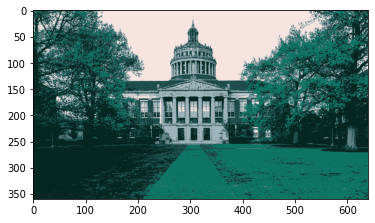

In [6]:
img_1 = img
centers_1, index_1 = k_means(img_1, 6)
for i in range(6):
    for id in index_1[i]:
        img_1[id[0],id[1]] = centers_1[i]
plt.imshow(img_1)

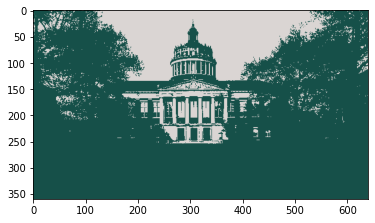

In [7]:
img_2 = img
centers_2, index_2 = k_means(img_2, 2)
for i in range(2):
    for id in index_2[i]:
        img_2[id[0],id[1]] = centers_2[i]
plt.imshow(img_2)

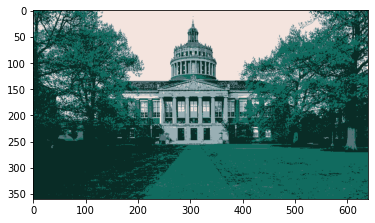

In [6]:
img_3 = img
centers_3, index_3 = k_means(img_3, 5)
for i in range(5):
    for id in index_3[i]:
        img_3[id[0],id[1]] = centers_3[i]
plt.imshow(img_3)